In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

w1 = np.random.randn(3, 10)
w2 = np.random.randn(10, 2)

x = np.array([1, 2, 3])

z1 = w1.T @ x
a1 = sigmoid(z1)

z2 = w2.T @ a1
a2 = sigmoid(z2)


u1 = np.random.randn(2, 10)
u2 = np.random.randn(10, 3)

z3 = u1.T @ a2
a3 = sigmoid(z3)
a4 = u2.T @ a3
#a4 = sigmoid(z4)

print(x, a4)



[1 2 3] [ 2.40268809  1.58528251 -0.84387039]


In [38]:
class BallGame():
  def __init__(self, size):
    self.size = size
    self.x = self.size // 2
    self.y = self.size // 2
    self.vx = 0 #0.2
    self.vy = 0
    self.g = -0.2 # Gravity acceleration constant

  def tick(self):
    self.vy += self.g

    self.x += self.vx
    self.y += self.vy

    if self.x < 0 or self.x >= self.size:
      self.vx *= -1
    
    if self.y < 0 or self.y >= self.size:
      self.vy *= -1

    self.y = min(max(0, self.y), self.size - 1)
    self.x = min(max(0, self.x), self.size - 1)

    frame = np.zeros((self.size, self.size))
    frame[int(self.size - self.y - 1), int(self.x)] = 1

    return frame

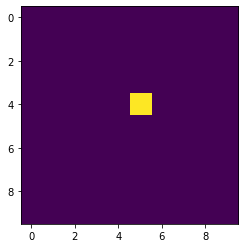

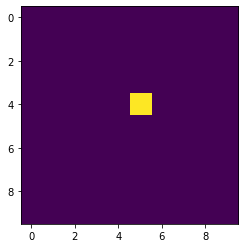

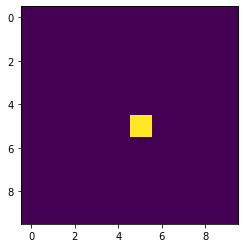

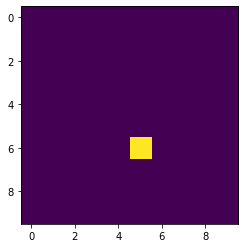

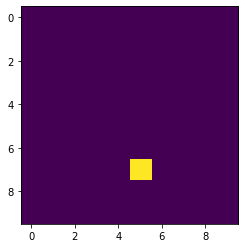

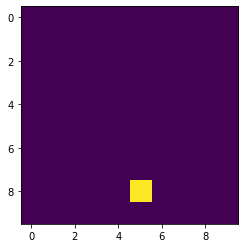

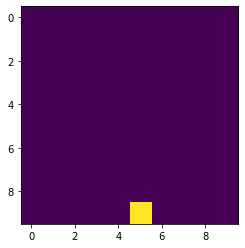

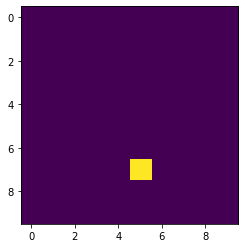

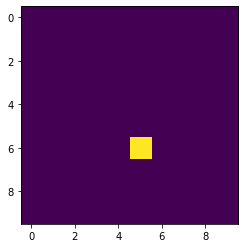

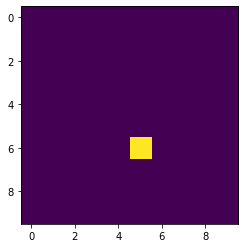

In [39]:
game = BallGame(10)

for i in range(10):
  frame = game.tick()
  plt.imshow(frame)
  plt.show()

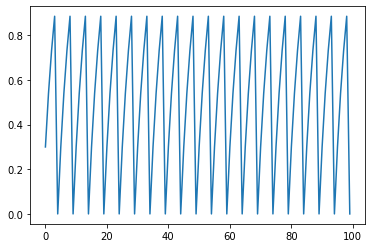

In [67]:
ns = []
n = 0
rn = 0
i = 0.3
gamma = 0.2

# dv/dt = i - g*v
# dv/dt = i - g*v


for t in range(100):
  dn = gamma * (rn - n) + i
  n += dn
  if n > 1:
    n = 0
  
  ns.append(n)

plt.plot(ns)
plt.show()


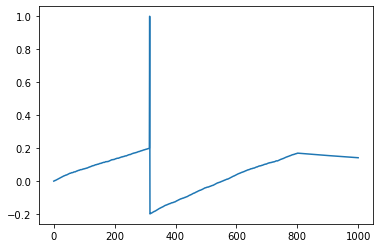

In [255]:
def i(t): #Poisson distribution
    if t > 800:
        return 0
    return 1 if np.random.random() < (3/4) else 0

v = 0

vs = [v]

v_t = 0.2
v_r = 0
v_d = -0.2
gamma = 0.9

for t in range(1000):
    dv = gamma * (v_r - v) + i(t)
    v += 0.001 * dv # Euler integration here, yay!
    if v >= v_t: # Spike here!
        vs.append(1)
        v = v_d # Depolarize
    else:
        vs.append(v)

plt.plot(vs)
plt.show()